In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_csv('movie_dataset.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-734df77b60b4>", line 1, in <module>
    df = pd.read_csv('movie_dataset.csv')
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/parsers.py", line 454, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/parsers.py", line 948, in __init__
    self._make_engine(self.engine)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/parsers.py", line 1180, in _make_engine
    self._en

In [42]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [43]:
df.columns

ERROR! Session/line number was not unique in database. History logging moved to new session 1041


Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'combined_features'],
      dtype='object')

In [44]:
df.shape

(4803, 25)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4803 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4803 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

<AxesSubplot:>

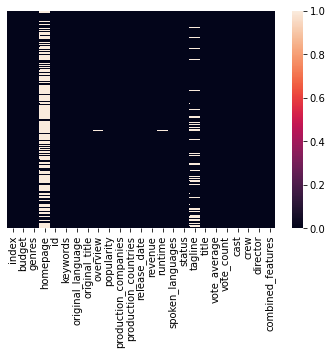

In [46]:
sns.heatmap(df.isnull(), yticklabels=False)

In [47]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'combined_features'],
      dtype='object')

In [48]:
featuresList = ['genres', 'keywords', 'cast', 'director']

In [49]:
def combineFeatures(row):
    return row['genres'] + " " + row['keywords'] + " " + row['cast'] + " " + row['director']

In [50]:
for features in featuresList:
    df[features] = df[features].fillna(' ')

<AxesSubplot:>

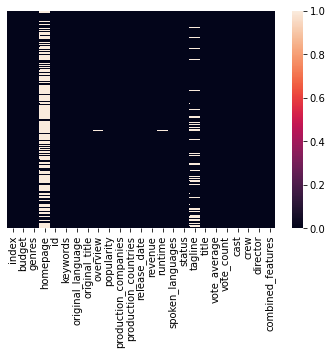

In [51]:
sns.heatmap(df.isnull(), yticklabels=False)

In [52]:
df['combined_features'] = df.apply(combineFeatures, axis=1)

In [53]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [54]:
df['combined_features']

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance   Edward Burns Kerry Bish\u00e9...
4800    Comedy Drama Romance TV Movie date love at fir...
4801        Daniel Henney Eliza Coupe Bill Paxton Alan...
4802    Documentary obsession camcorder crush dream gi...
Name: combined_features, Length: 4803, dtype: object

In [55]:
df.iloc[0].combined_features

'Action Adventure Fantasy Science Fiction culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'

In [56]:
cv = CountVectorizer()

In [57]:
countMatrix = cv.fit_transform(df['combined_features'])

In [58]:
countMatrix

<4803x14845 sparse matrix of type '<class 'numpy.int64'>'
	with 97547 stored elements in Compressed Sparse Row format>

In [59]:
df.shape

(4803, 25)

In [60]:
cosineSim = cosine_similarity(countMatrix)

In [61]:
cosineSim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [62]:
def getTitle(index):
    return df[df.index==index]['title'].values[0]

In [63]:
def getIndex(title):
    return df[df.title==title]['index'].values[0]

In [64]:
movieUserLikes = 'Batman Begins'

In [65]:
movieIndex = getIndex(movieUserLikes)

In [66]:
movieIndex

119

In [67]:
similarMovies = list(enumerate(cosineSim[movieIndex]))

#[(0, 0.3),
#(1, 0.35), 
#(2, 60)]


#[(2,60), (1, 0.35), (0, 0.3)]

In [68]:
similarMovies

[(0, 0.03774256780481986),
 (1, 0.03580574370197164),
 (2, 0.16357216402190616),
 (3, 0.7307692307692306),
 (4, 0.03922322702763681),
 (5, 0.07844645405527362),
 (6, 0.0),
 (7, 0.03580574370197164),
 (8, 0.04181210050035454),
 (9, 0.12009611535381537),
 (10, 0.11766968108291043),
 (11, 0.19611613513818404),
 (12, 0.04089304100547654),
 (13, 0.03922322702763681),
 (14, 0.14824986333222023),
 (15, 0.0),
 (16, 0.03522349768381735),
 (17, 0.04181210050035454),
 (18, 0.07161148740394328),
 (19, 0.04181210050035454),
 (20, 0.04003203845127179),
 (21, 0.04003203845127179),
 (22, 0.0),
 (23, 0.0),
 (24, 0.06933752452815364),
 (25, 0.043852900965351466),
 (26, 0.03706246583305506),
 (27, 0.04003203845127179),
 (28, 0.04003203845127179),
 (29, 0.08362420100070908),
 (30, 0.07692307692307693),
 (31, 0.03922322702763681),
 (32, 0.0),
 (33, 0.03706246583305506),
 (34, 0.0),
 (35, 0.08559209850218259),
 (36, 0.08006407690254358),
 (37, 0.0),
 (38, 0.038461538461538464),
 (39, 0.11538461538461539),
 

In [69]:
sortedMovies = sorted(similarMovies, key= lambda x:x[1], reverse=True)[1:]

In [70]:
sortedMovies

[(3, 0.7307692307692306),
 (65, 0.6538461538461537),
 (4638, 0.45291081365783836),
 (428, 0.3602883460614461),
 (1359, 0.3530090432487313),
 (210, 0.3396831102433788),
 (1196, 0.3344968040028364),
 (1720, 0.3335621924974955),
 (1740, 0.32776066832815337),
 (3332, 0.3149448894660932),
 (2793, 0.3069703067574603),
 (3819, 0.2926847035024818),
 (813, 0.264197974633739),
 (4065, 0.2594372608313854),
 (1742, 0.2567762955065478),
 (2790, 0.25492496425523037),
 (2649, 0.2531848417709166),
 (1765, 0.25087260300212727),
 (3966, 0.25087260300212727),
 (4099, 0.2508726030021272),
 (1792, 0.24535824603285922),
 (2398, 0.24535824603285922),
 (3359, 0.24514516892273006),
 (3293, 0.24019223070763074),
 (4135, 0.24019223070763074),
 (1503, 0.23782574707724707),
 (982, 0.23533936216582085),
 (1234, 0.23533936216582085),
 (3603, 0.23533936216582085),
 (3001, 0.2311250817605122),
 (280, 0.23076923076923078),
 (3073, 0.23076923076923078),
 (72, 0.22645540682891915),
 (1664, 0.22645540682891915),
 (1114, 0

In [71]:
x = np.round(sortedMovies[0][1]*100, 2)
print(int(x))
type(int(x))

73


int

In [72]:
sortedMovies

[(3, 0.7307692307692306),
 (65, 0.6538461538461537),
 (4638, 0.45291081365783836),
 (428, 0.3602883460614461),
 (1359, 0.3530090432487313),
 (210, 0.3396831102433788),
 (1196, 0.3344968040028364),
 (1720, 0.3335621924974955),
 (1740, 0.32776066832815337),
 (3332, 0.3149448894660932),
 (2793, 0.3069703067574603),
 (3819, 0.2926847035024818),
 (813, 0.264197974633739),
 (4065, 0.2594372608313854),
 (1742, 0.2567762955065478),
 (2790, 0.25492496425523037),
 (2649, 0.2531848417709166),
 (1765, 0.25087260300212727),
 (3966, 0.25087260300212727),
 (4099, 0.2508726030021272),
 (1792, 0.24535824603285922),
 (2398, 0.24535824603285922),
 (3359, 0.24514516892273006),
 (3293, 0.24019223070763074),
 (4135, 0.24019223070763074),
 (1503, 0.23782574707724707),
 (982, 0.23533936216582085),
 (1234, 0.23533936216582085),
 (3603, 0.23533936216582085),
 (3001, 0.2311250817605122),
 (280, 0.23076923076923078),
 (3073, 0.23076923076923078),
 (72, 0.22645540682891915),
 (1664, 0.22645540682891915),
 (1114, 0

In [73]:
i = 0
print("Movies similar to " + movieUserLikes + " are:\n")

for movie in sortedMovies:
    print(getTitle(movie[0]))
    i += 1
    if i>10:
        break

Movies similar to Batman Begins are:

The Dark Knight Rises
The Dark Knight
Amidst the Devil's Wings
Batman Returns
Batman
Batman & Robin
The Prestige
Kick-Ass
Kick-Ass 2
Harry Brown
The Killer Inside Me


## Exporting the model

In [79]:
import pickle

filename = 'Model.pkl'
pickle.dump(cosineSim, open(filename, 'wb'))

## Loading and Testing the model

In [80]:
import pickle

filename = 'Model.pkl'
loadedModel = pickle.load(open(filename, 'rb'))

In [81]:
movieUserLikes = input("Enter a movie you like: ")
movieIndex = getIndex(movieUserLikes)

similarMovies = list(enumerate(loadedModel[movieIndex]))
sortedMovies = sorted(similarMovies, key= lambda x:x[1], reverse=True)[1:]

limit = int(input("How many recommendations do you want? "))

i = 1

print("\n", limit, "movies you might like:\n")
for movie in sortedMovies:
    print(i, ".", getTitle(movie[0]))
    i += 1
    
    if i > limit:
        break

Enter a movie you like: Batman
How many recommendations do you want? 5

 5 movies you might like:

1 . Batman Returns
2 . Batman & Robin
3 . The Dark Knight Rises
4 . The Dark Knight
5 . Batman Begins
